<a href="https://colab.research.google.com/github/h5ng/4_prography_node_study/blob/master/3-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

X = digits.data
Y = digits.target

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [7]:
# Dataset 작성
ds = TensorDataset(X, Y)

# 순서로 섞어서 64개씩 데이터를 반환하는 DataLoader 작성
loader = DataLoader(dataset=ds, batch_size=64, shuffle=True)

net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [11]:
losses = []

for epoch in range(100):
  running_loss = 0.0
  for xx, yy in loader:
    # xx, yy는 64개만 받는다
    y_pred = net(xx)
    loss = loss_fn(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  losses.append(running_loss)

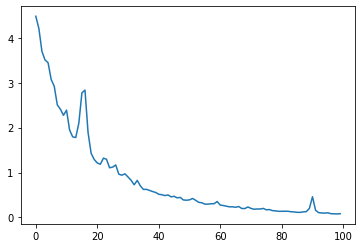

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)